In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
fontsize=15
fontweight='bold'
import seaborn as sns 
sns.set(rc={'figure.figsize':(13,10)})
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib

/Users/farhanishraq/Downloads/Winter2019-20/backend/venv/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
def changeToObject(self):
    df[self] = df[self].astype('str')


In [3]:
df = pd.read_csv('car.csv')

In [4]:
#let's begin by taking a look at the dataset:
df.head()

,brand,model,model_yr,condition,body,fuel_type,engine_cap,milage,price,registration
0,Honda,Vezel,2015,Reconditioned,SUV / 4x4,Hybrid,"1,500 cc",30000,2650000,NaN
1,Toyota,Axio,2015,Reconditioned,Saloon,"Hybrid, Octane","1,500 cc",38000,1800000,NaN
2,Toyota,Corolla,2004,Used,Saloon,Octane,"1,500 cc",75632,980000,NaN
3,Toyota,Allion,2005,Used,Saloon,"CNG, Octane","1,500 cc",57325,1180000,2007.0
4,Toyota,Axio,2013,Used,Hatchback,Octane,"1,500 cc",35487,1550000,2016.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
brand           420 non-null object
model           420 non-null object
model_yr        420 non-null int64
condition       420 non-null object
body            404 non-null object
fuel_type       420 non-null object
engine_cap      420 non-null object
milage          420 non-null int64
price           420 non-null int64
registration    275 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 32.9+ KB


From the above code we can see that two columns contain missing values but before we talk about the two columns, let me introduce you to all the columns.

### Some Insight about the columns:

- brand: This is the name of the car manufacturer.
- model: This is model name for a certain car.
- model_yr: The year the model was made.
- condition: This shows whether the car listings are used, reconditioned or new. Reconditioned cars are another form of used car, except for the previous owner of the car sent it back to the car manufacturer. The manufacturer ususally reconditions the car to sell it back to the market. The concept is similar to Refurbished products.
- body: This is body type of the car.
- fuel_type: This is type of fuel the car uses.
- engine_cap: "cc" stands for cubic centimeter. Hence 1,500 cc is equivallant to 1.5L cars.
- milage: The number of miles/kilometers the car has run before it was listed.
- registration- The year the car was registered
- price: The price seller is asking

Now that we are familiar with all the columns, let's talk about missing values. For both the columns registration and body type, the seller most probably did not want to share that information for which it is blank. Therefore, instead of removing the nulls, we will be replacing it with None. This will help us retain all of our data. We also want to change registration and model_yr into string object and drop the column condition since 

In [6]:
changeToObject('registration')
changeToObject('model_yr')
df.drop(columns='condition', inplace = True) 

In [7]:
replace_by_none = df.loc[:, ['registration','body']]
for i in replace_by_none.columns:
    df[i].fillna('None', inplace = True)

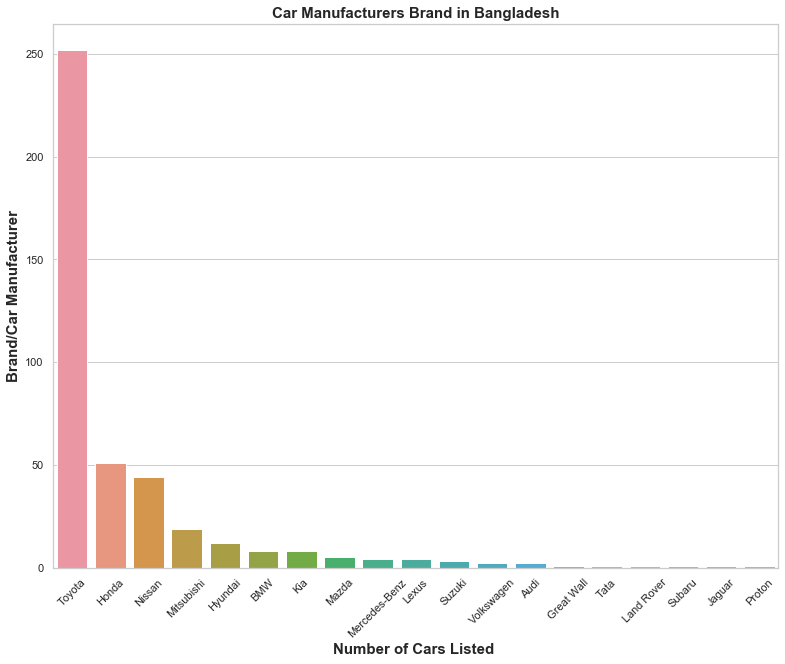

In [8]:
sns.countplot(x="brand", data=df,order=df.brand.value_counts().index)
plt.title("Car Manufacturers Brand in Bangladesh",fontsize=fontsize,
         fontweight=fontweight)
plt.xlabel("Number of Cars Listed ",fontsize=fontsize,fontweight=fontweight)
plt.xticks(rotation=45)
plt.ylabel("Brand/Car Manufacturer", fontsize=fontsize,fontweight=fontweight)
plt.show()

This might seem surprising to many people residing outside of Bangladesh but it should come as no surprise because people in Bangladesh tend to buy Toyotas given that Toyota sells reconditioned cars and other manufacturers don't. This barplot generalizes the car scene in Bangladesh as one who visits would see.

## Let's talk prices

Anyone who would want to buy or sell cars may want to know the market price of the certain car they want to buy. Lets create a function that would help us do that.

In [9]:
# We want to work with somewhat of a representative data to get a better picture so let's take the top 5 manufacturers
df.brand.value_counts().head(4)

Toyota        252
Honda          51
Nissan         44
Mitsubishi     19
Name: brand, dtype: int64

In [10]:
df = df[(df.brand == 'Toyota')|(df.brand == 'Honda') | (df.brand == 'Nissan') ]

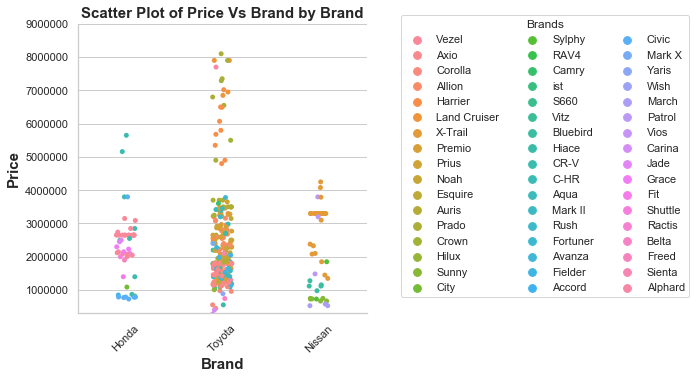

In [11]:
sns.catplot(data=df,x='brand',y='price',hue='model',legend=False)
plt.ylim(300000,9000000)
plt.xticks(rotation=45)
plt.xlabel("Brand",fontsize=fontsize,fontweight=fontweight)
plt.ylabel("Price",fontsize=fontsize,fontweight=fontweight)
plt.title("Scatter Plot of Price Vs Brand by Brand",fontsize=fontsize,
         fontweight=fontweight)
plt.legend(bbox_to_anchor=(1.1, 1.05),ncol=3,title='Brands')
plt.show()

This plot shows us that there are outliers within these brands that push the price up, if we were to calculate mean prices. Hence, a better approach to get a clearer picture would be to know the median as this measure is not affected by outliers. The other notebook 'Analytics Interactive' will have methods for calculating the mean and median.

Let us now move forward to see a representative sample of top model among the popular brands:


In [12]:
df.model.value_counts().head(10)

Premio          40
Axio            36
Allion          30
X-Trail         25
Prado           23
Vezel           23
Noah            16
Harrier         12
Land Cruiser    12
Corolla         11
Name: model, dtype: int64

In [13]:
#Using only the top 6 to preserve representation:
topmodel = df.model.value_counts().head(6).index

In [14]:
df = df[(df.model == topmodel[0])|(df.model == topmodel[1]) | (df.model == topmodel[2]) | (df.model == topmodel[3])|
(df.model == topmodel[4]) | (df.model == topmodel[5])]

### Model Year and Registration Year

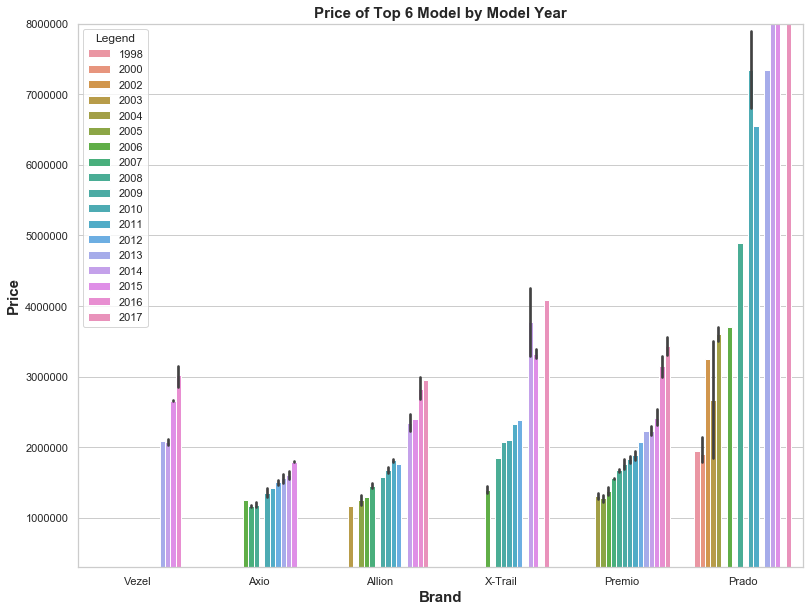

In [18]:

sns.barplot(x='model',y='price',hue='model_yr',data=df)
plt.title("Price of Top 6 Model by Model Year",fontsize=fontsize,
         fontweight=fontweight, loc='center')
plt.legend(loc='upper left',title='Legend')
plt.xlabel("Brand",fontsize=fontsize,fontweight=fontweight)
plt.ylabel("Price",fontsize=fontsize,fontweight=fontweight)
plt.ylim(300000,8000000)
plt.savefig('../../ui/src/assets/modelYearPrice.png')
plt.show()


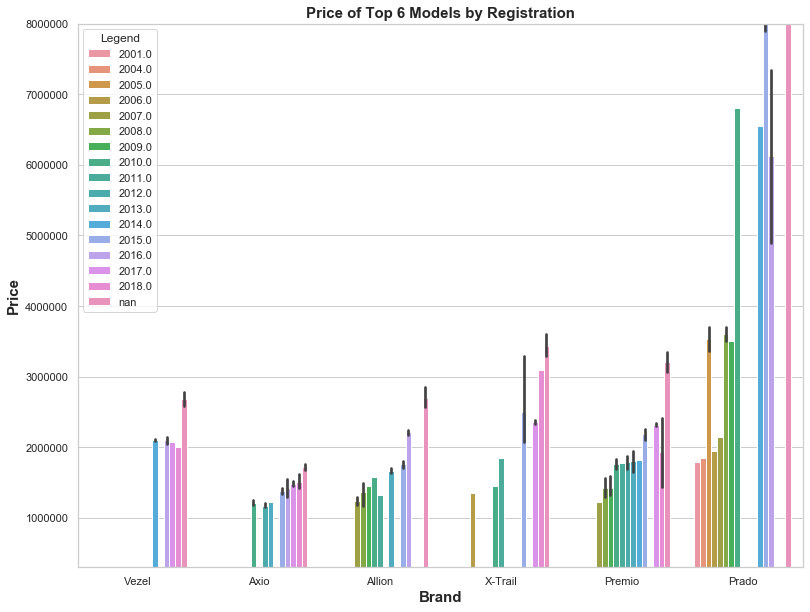

In [363]:
sns.barplot(x='model',y='price',hue='registration',data=df)
plt.title("Price of Top 6 Models by Registration",fontsize=fontsize,
         fontweight=fontweight, loc='center')
plt.legend(loc='upper left',title='Legend')
plt.xlabel("Brand",fontsize=fontsize,fontweight=fontweight)
plt.ylabel("Price",fontsize=fontsize,fontweight=fontweight)
plt.ylim(300000,8000000)
plt.show()

For all models, we can see that there is a upward trend in the relationship between Price againsts both model and registration year. In other words, as both model year and registration year increases, price also tend to increase.

### Body Type

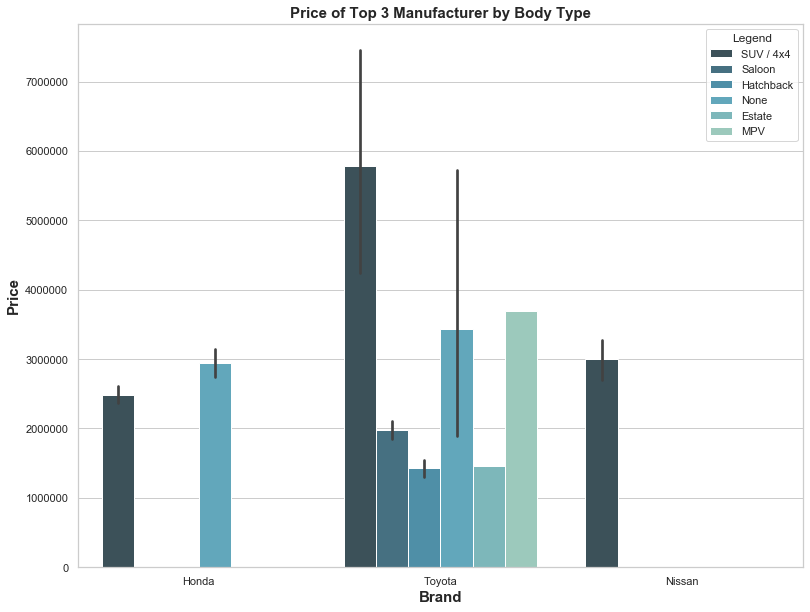

In [19]:
sns.barplot(x='brand',y='price',hue='body',data=df)
plt.title("Price of Top 3 Manufacturer by Body Type",fontsize=fontsize,
         fontweight=fontweight)
plt.legend(loc='upper right',title='Legend')
plt.xlabel("Brand",fontsize=fontsize,fontweight=fontweight)
plt.ylabel("Price",fontsize=fontsize,fontweight=fontweight)
plt.savefig('../../ui/src/assets/brandManfType.png')
plt.show()

From this we want to note the following:
    - SUV/4x4 body types were found to be more prevalent.
    - The price for SUV/4x4 body types were higher in Toyota than any other brand.
    - Nissan only has the SUV/4x4 body type, with Honda's having SUV and hatchbacks only. 
Living in Bangladesh for 18 years, I have observed that all the SUV body types have the same features in the car, except for the Toyota's were priced higher. This is due to the fact how prevalent the brand is in Bangladesh and the familiarity of car workshops to work on Toyota's for maintainence. This is turn raises the demand for these cars in the market, which causes the prices to be higher than its competitors.


### Fuel Type

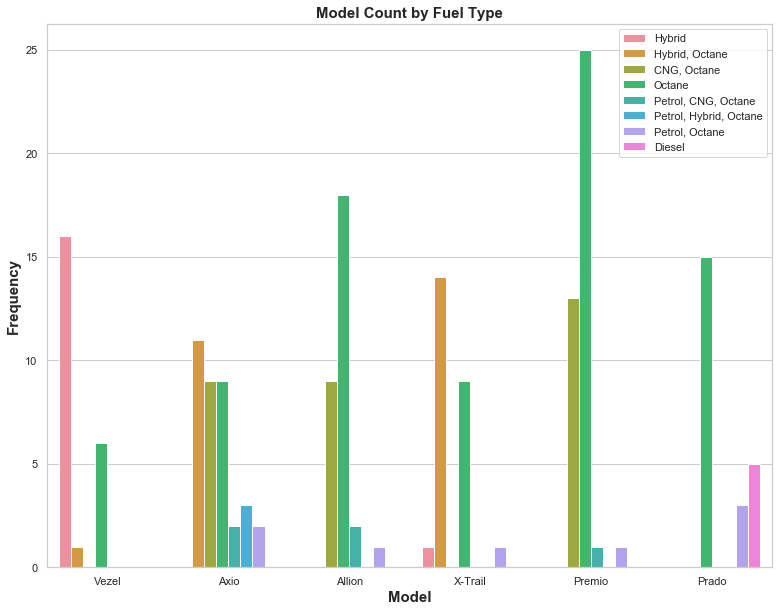

In [365]:
sns.countplot(x='model', data=df,hue='fuel_type',saturation=0.85)
plt.legend(loc='upper right')
plt.title("Model Count by Fuel Type",fontsize=fontsize,
         fontweight=fontweight)
plt.xlabel("Model",fontsize=fontsize,fontweight=fontweight)
plt.ylabel("Frequency",fontsize=fontsize,fontweight=fontweight)
plt.show()

The most popular form of fuel in most cars are Octane, followed by CNG,Octane and Hybrid.

As per wikipedia, "Compressed natural gas (CNG) (methane stored at high pressure) is a fuel that can be used in place of gasoline, diesel fuel and liquefied petroleum gas (LPG). CNG combustion produces fewer undesirable gases than the aforementioned fuels." Most people in Bangladesh usually buys their car which comes in with no CNG feature, which they later on add making such a category as "CNG,Octane" to exist. 



### Engine Capacity

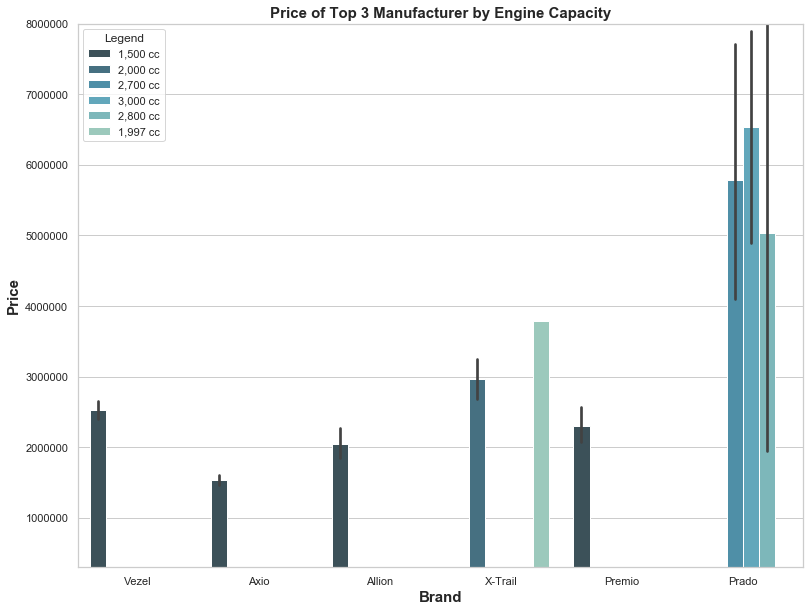

In [20]:
sns.barplot(x='model',y='price',hue='engine_cap'
            ,data=df)
plt.title("Price of Top 3 Manufacturer by Engine Capacity",fontsize=fontsize,
         fontweight=fontweight)
plt.legend(loc='upper left',title='Legend')
plt.xlabel("Brand",fontsize=fontsize,fontweight=fontweight)
plt.ylabel("Price",fontsize=fontsize,fontweight=fontweight)
plt.ylim(300000,8000000)
plt.savefig('../../ui/src/assets/Engine.png')
plt.show()

This plot shows us that the engine capacity for Vezel, Axio, Allion and Premio only comes in 1,500 cc which means that our model will not be able to predict any better when we will insert any other value for engine capacity in our website. We also need to note that Prado only comes in with 2,000 cc to 2,800 cc. This is something we should keep in mind while using the website, as the model we will use to train will not train with Vezel having 2,000 cc for example.

### Milage

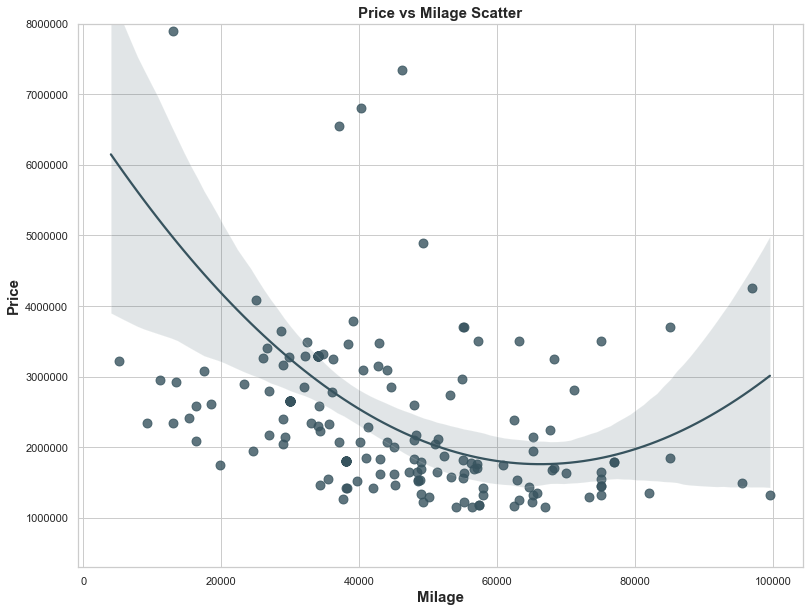

In [367]:
sns.regplot(data=df,x='milage',y='price',scatter_kws={"s": 80},
           order=2, truncate=True,)
plt.ylim(300000,8000000)
plt.title("Price vs Milage Scatter", fontsize=fontsize,fontweight=fontweight)
plt.xlabel("Milage",fontsize=fontsize,fontweight=fontweight)
plt.ylabel("Price",fontsize=fontsize,fontweight=fontweight)
plt.show()

Milage is important to buyers and sellers in Bangladesh, in a way that higher milage usually tend to reduce the price of a car. This plot and speard has some disadvantages which will tend to refute my claim since Toyota models are more preferred than any other brands which would mean that a Toyota and Nissan with the same milage can have different implications- the former is valued higher.

Since we already have a small dataset, I want to preserve these features for the purpose of my website, which is a demonstration of what can be done given that we get more data to train our model, which would lead to better reliability.

### Outlier

In [368]:
def boxplt():    
    sns.boxplot(y='price',data=df)
    plt.ylim(300000,9000000)
    plt.title("Price Box Plot and Outliers", fontsize=fontsize,fontweight=fontweight)
    plt.show()

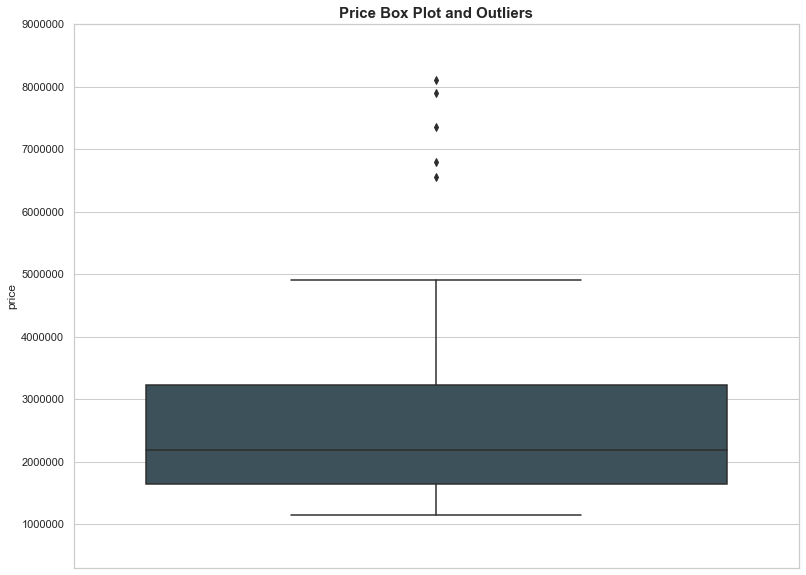

In [369]:
boxplt()

Let us remove these outliers using Interquartile range (IQR) to detect and remove any outliers. We will be focusing on outliers that are greater than the IQR since we can see there are no extreme values at the bottom of the plot.

In [370]:
def rmv_extreme():
    q3 = df['price'].quantile(q=.75)
    q2 = df['price'].quantile(q=.5)
    q1 = df['price'].quantile(q=.25)
    iqr = q3-q1
    outli = q3 + (1.5 * iqr)
    index_names = df[df['price'] > outli].index
    df.drop(index_names,inplace=True)

In [371]:
rmv_extreme()

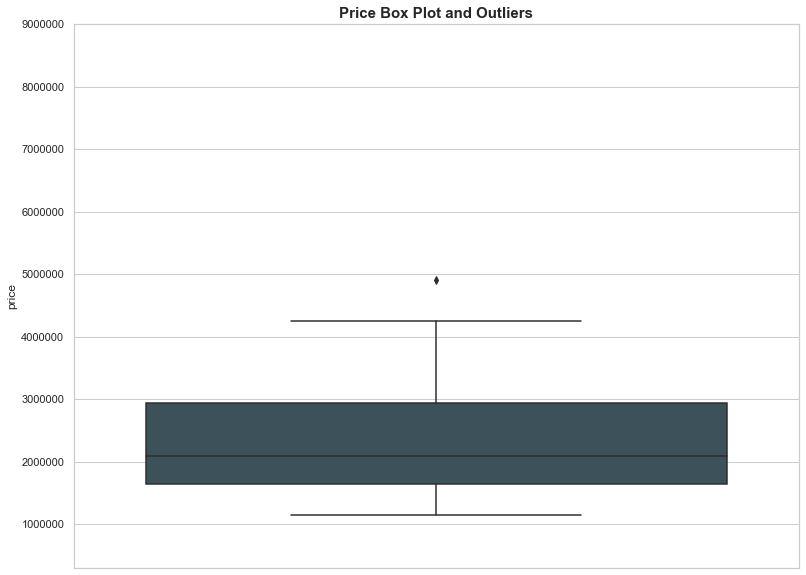

In [372]:
boxplt()

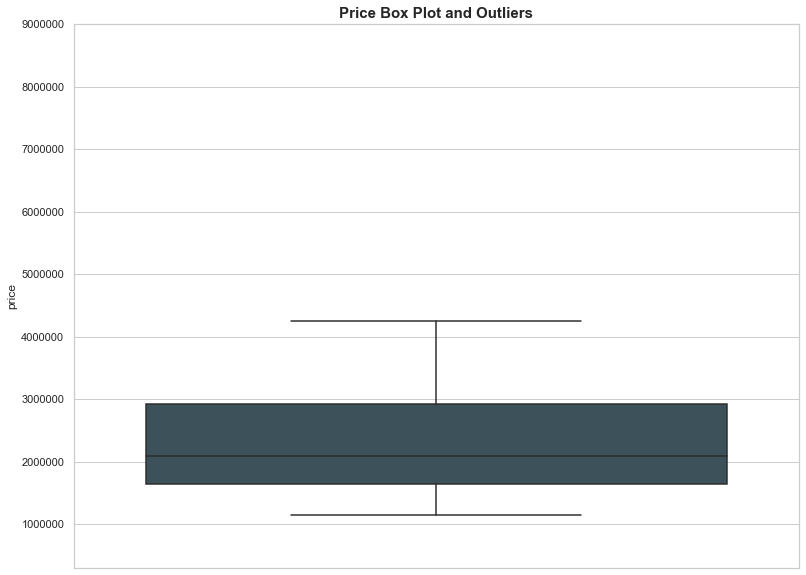

In [373]:
# It seems like we would need to run the IQR again to remove that value:
rmv_extreme()
boxplt()

Now that we have filtered the data to ensure we get a dataset which is representative of the car market, we can now proceed forward to train our model.

## Model Training and Test

In [374]:
## Drop selling price for train our model
sale_price = df['price']
df.drop('price',axis=1,inplace=True)

cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(include=["int64","float64"])

num_attribs = list(num)
cat_attribs = list(cat)

In [375]:
len(df)

166

This is a major drawback that our data only consists of 166 instances, among which we have 3 brands with more instances from Toyota. Since we already have a small dataset, we want to train our model with as much data as possible

In [376]:
#Spilliting the dataset into train-test with a training size of 97% to give the model more data to learn from
X_train, X_test, y_train, y_test = train_test_split(df,sale_price,random_state=42,train_size=0.97)

In [377]:
# Creating a pipeline to transform the dataset by normalizing numerical features and encoding categorical features:
pipeline = ColumnTransformer([
                             ('numm', StandardScaler(),num_attribs),
                              ('catt', OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_attribs)
])

In [378]:
X = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

### Linear Regression
Since we have a small dataset, we want to employ the most simple model to train our data

In [379]:
lin_reg = LinearRegression()
lin_reg.fit(X,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [380]:
y_train_pred = lin_reg.predict(X)

In [381]:
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse.round(2)

162616.75

In [382]:
y_test_pred = lin_reg.predict(X_test_tr)

In [383]:
final_mse = mean_squared_error(y_test,y_test_pred)
final_rmse = np.sqrt(final_mse)
final_rmse.round(2)

138919.95

Our model seems to have performed better on the test set, however it is important that we keep note of our limitations. An error of btd 157263.94 means that the users of the website cannot fully rely on the prediction but use it as an estimate of what it could be worth.

